In [14]:
%cd ../../..

/


In [15]:
%matplotlib inline

from __future__ import annotations
from dataclasses import dataclass
import os
import gc
import tensorflow as tf

from Training import NewDataModelTrainer
from ModelBuilders import TestEfficientNetB2Builder, TestEfficientNetB0Builder, TestResNetBuilder, TestVgg16NetBuilder, ModelOptions
from itertools import product

In [16]:
def enable_gpu_memory_growth():
    """
    Enables memory growth mode for GPUs.
    """
    gpus = tf.config.experimental.list_physical_devices('GPU')
    assert len(gpus) > 0, "No GPUs detected!"
            
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

In [17]:
@dataclass
class ModelNN:
    modelNN: int
    trainable_froms: list[int]

@dataclass
class BuilderTests:
    def __init__(self, 
        ingest_denses: list[int],
        output_denses: list[int],
        modelNNs: list[ModelNN],
        epochs_list: list[int],
        batch_list: list[int],
        builder_label: str):

        self.ingest_denses = ingest_denses
        self.output_denses = output_denses
        self.modelNNs = modelNNs
        self.epochs_list = epochs_list
        self.batch_list = batch_list

        self.builder_label = builder_label
        
    def generate_options(self):
        tests = product(self.ingest_denses, self.output_denses, self.modelNNs, self.epochs_list, self.batch_list)

        for ingest_dense, output_dense, modellNN, epochs, batch_size in tests:
            for trainable_from in modellNN.trainable_froms:
                if trainable_from > modellNN.modelNN:
                    continue

                yield ModelOptions(
                    builder_label=self.builder_label,
                    model_nn=modellNN.modelNN,
                    ingest_dense=ingest_dense,
                    output_dense=output_dense,
                    trainable_from_index=trainable_from,
                    epochs=epochs,
                    batch_size=batch_size)


In [18]:
efficient_b2_tests = BuilderTests(
    ingest_denses=[64],
    output_denses=[8],
    modelNNs=[
        ModelNN(59, [0, 25, 59]), 
        ModelNN(68, [0, 25, 68]), 
        ModelNN(111, [68, 111]),
        ModelNN(331, [331]),
    ],
    epochs_list=[6],
    batch_list=[16],
    builder_label="Experimental/NewTraining/EfficientNetB2")

for test in efficient_b2_tests.generate_options():
    print(test.representation())

nn59-train0-id64-od8-e6-b16
nn59-train25-id64-od8-e6-b16
nn59-train59-id64-od8-e6-b16
nn68-train0-id64-od8-e6-b16
nn68-train25-id64-od8-e6-b16
nn68-train68-id64-od8-e6-b16
nn111-train68-id64-od8-e6-b16
nn111-train111-id64-od8-e6-b16
nn331-train331-id64-od8-e6-b16


In [19]:
def run_efficientb2_net(options):
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
    enable_gpu_memory_growth()

    model_builder = TestEfficientNetB2Builder(options)
    model_trainer = NewDataModelTrainer()

    model_trainer.run(model_builder)

    tf.keras.backend.clear_session()
    gc.collect()
    print("-" * 80)

In [20]:
import multiprocessing

for options in efficient_b2_tests.generate_options():
    p1 = multiprocessing.Process(target=run_efficientb2_net, args=[options])

    p1.start()
    p1.join()

Now testing... Experimental/NewTraining/EfficientNetB2 nn59-train0-id64-od8-e6-b16


Process Process-32:
Traceback (most recent call last):
  File "/usr/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_874236/3585004263.py", line 8, in run_efficientb2_net
    model_trainer.run(model_builder)
  File "/workspaces/Code/Training/new_data_model_trainer.py", line 182, in run
    self._train_model(model_builder)
  File "/workspaces/Code/Training/new_data_model_trainer.py", line 52, in _train_model
    self.training_config.train_triplet(options),
  File "/workspaces/Code/Training/training_config.py", line 26, in train_triplet
    train_ds = tf.data.Dataset.list_files(str(self.train_dir + '/*/*.png'), shuffle=False)
  File "/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/dataset_ops.py", line 1348, in list_files
    assert_not_empty = control_flow_ops.Assert(
  File "/usr/local/lib/python

Now testing... Experimental/NewTraining/EfficientNetB2 nn59-train25-id64-od8-e6-b16


Process Process-33:
Traceback (most recent call last):
  File "/usr/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_874236/3585004263.py", line 8, in run_efficientb2_net
    model_trainer.run(model_builder)
  File "/workspaces/Code/Training/new_data_model_trainer.py", line 182, in run
    self._train_model(model_builder)
  File "/workspaces/Code/Training/new_data_model_trainer.py", line 52, in _train_model
    self.training_config.train_triplet(options),
  File "/workspaces/Code/Training/training_config.py", line 26, in train_triplet
    train_ds = tf.data.Dataset.list_files(str(self.train_dir + '/*/*.png'), shuffle=False)
  File "/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/dataset_ops.py", line 1348, in list_files
    assert_not_empty = control_flow_ops.Assert(
  File "/usr/local/lib/python

Now testing... Experimental/NewTraining/EfficientNetB2 nn59-train59-id64-od8-e6-b16


Process Process-34:
Traceback (most recent call last):
  File "/usr/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_874236/3585004263.py", line 8, in run_efficientb2_net
    model_trainer.run(model_builder)
  File "/workspaces/Code/Training/new_data_model_trainer.py", line 182, in run
    self._train_model(model_builder)
  File "/workspaces/Code/Training/new_data_model_trainer.py", line 52, in _train_model
    self.training_config.train_triplet(options),
  File "/workspaces/Code/Training/training_config.py", line 26, in train_triplet
    train_ds = tf.data.Dataset.list_files(str(self.train_dir + '/*/*.png'), shuffle=False)
  File "/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/dataset_ops.py", line 1348, in list_files
    assert_not_empty = control_flow_ops.Assert(
  File "/usr/local/lib/python

Now testing... Experimental/NewTraining/EfficientNetB2 nn68-train0-id64-od8-e6-b16


Process Process-35:
Traceback (most recent call last):
  File "/usr/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_874236/3585004263.py", line 8, in run_efficientb2_net
    model_trainer.run(model_builder)
  File "/workspaces/Code/Training/new_data_model_trainer.py", line 182, in run
    self._train_model(model_builder)
  File "/workspaces/Code/Training/new_data_model_trainer.py", line 52, in _train_model
    self.training_config.train_triplet(options),
  File "/workspaces/Code/Training/training_config.py", line 26, in train_triplet
    train_ds = tf.data.Dataset.list_files(str(self.train_dir + '/*/*.png'), shuffle=False)
  File "/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/dataset_ops.py", line 1348, in list_files
    assert_not_empty = control_flow_ops.Assert(
  File "/usr/local/lib/python

Now testing... Experimental/NewTraining/EfficientNetB2 nn68-train25-id64-od8-e6-b16


Process Process-36:
Traceback (most recent call last):
  File "/usr/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_874236/3585004263.py", line 8, in run_efficientb2_net
    model_trainer.run(model_builder)
  File "/workspaces/Code/Training/new_data_model_trainer.py", line 182, in run
    self._train_model(model_builder)
  File "/workspaces/Code/Training/new_data_model_trainer.py", line 52, in _train_model
    self.training_config.train_triplet(options),
  File "/workspaces/Code/Training/training_config.py", line 26, in train_triplet
    train_ds = tf.data.Dataset.list_files(str(self.train_dir + '/*/*.png'), shuffle=False)
  File "/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/dataset_ops.py", line 1348, in list_files
    assert_not_empty = control_flow_ops.Assert(
  File "/usr/local/lib/python

Now testing... Experimental/NewTraining/EfficientNetB2 nn68-train68-id64-od8-e6-b16


Process Process-37:
Traceback (most recent call last):
  File "/usr/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_874236/3585004263.py", line 8, in run_efficientb2_net
    model_trainer.run(model_builder)
  File "/workspaces/Code/Training/new_data_model_trainer.py", line 182, in run
    self._train_model(model_builder)
  File "/workspaces/Code/Training/new_data_model_trainer.py", line 52, in _train_model
    self.training_config.train_triplet(options),
  File "/workspaces/Code/Training/training_config.py", line 26, in train_triplet
    train_ds = tf.data.Dataset.list_files(str(self.train_dir + '/*/*.png'), shuffle=False)
  File "/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/dataset_ops.py", line 1348, in list_files
    assert_not_empty = control_flow_ops.Assert(
  File "/usr/local/lib/python

Now testing... Experimental/NewTraining/EfficientNetB2 nn111-train68-id64-od8-e6-b16


In [ ]:
efficient_b0_tests = BuilderTests(
    ingest_denses=[64],
    output_denses=[8],
    modelNNs=[
        ModelNN(30, [0, 19, 30]), 
        ModelNN(71, [0, 30, 71]), 
        ModelNN(140, [140, 71, 0]),
        ModelNN(254, [254, 0]),
        ModelNN(251, [251, 0]),
    ],
    epochs_list=[6],
    batch_list=[16],
    builder_label="Experimental/NewTraining/EfficientNetV2B0")

for test in efficient_b0_tests.generate_options():
    print(test.representation())

nn30-train0-id64-od8-e6-b16
nn30-train19-id64-od8-e6-b16
nn30-train30-id64-od8-e6-b16
nn71-train0-id64-od8-e6-b16
nn71-train30-id64-od8-e6-b16
nn71-train71-id64-od8-e6-b16
nn140-train140-id64-od8-e6-b16
nn140-train71-id64-od8-e6-b16
nn140-train0-id64-od8-e6-b16
nn254-train254-id64-od8-e6-b16
nn254-train0-id64-od8-e6-b16
nn251-train251-id64-od8-e6-b16
nn251-train0-id64-od8-e6-b16


In [ ]:
def run_efficient_net(options):
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

    enable_gpu_memory_growth()

    model_builder = TestEfficientNetB0Builder(options)
    model_trainer = NewDataModelTrainer()

    model_trainer.run(model_builder)

    tf.keras.backend.clear_session()
    gc.collect()
    print("-" * 80)

Now testing... Experimental/NewTraining/EfficientNetV2B0 nn30-train0-id64-od8-e6-b16
Experiments already complete. Remove the '.complete' file for re-run
--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/EfficientNetV2B0 nn30-train19-id64-od8-e6-b16
Experiments already complete. Remove the '.complete' file for re-run
--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/EfficientNetV2B0 nn30-train30-id64-od8-e6-b16
Experiments already complete. Remove the '.complete' file for re-run
--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/EfficientNetV2B0 nn71-train0-id64-od8-e6-b16
Experiments already complete. Remove the '.complete' file for re-run
--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/EfficientNetV2B0 n

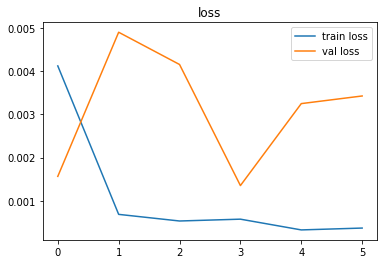

Calculating training stats...
10290/10290 [==============================] - 50s 5ms/step
(10, 3, 224, 224, 3)


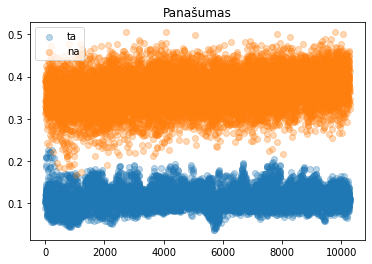

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:11<00:00,  6.55s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Processing recall locations: 100%|██████████| 1000/1000 [05:07<00:00,  3.25it/s]



--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/EfficientNetV2B0 nn254-train254-id64-od8-e6-b16
Experiments already complete. Remove the '.complete' file for re-run
--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/EfficientNetV2B0 nn254-train0-id64-od8-e6-b16
Epoch 1/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0069 - pd: 0.6400 - nd: 1.4562
Epoch 1: val_loss improved from inf to 0.00510, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/EfficientNetV2B0/weights.best.hdf5
2172/2172 [==============================] - 358s 159ms/step - loss: 0.0069 - pd: 0.6400 - nd: 1.4562 - val_loss: 0.0051 - val_pd: 0.4255 - val_nd: 1.3038 - lr: 0.0010
Epoch 2/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0017 - pd: 0.5829 - nd: 1.4308
Epoch 2: val_loss improved from 0.00510 to 0.00477, saving model t

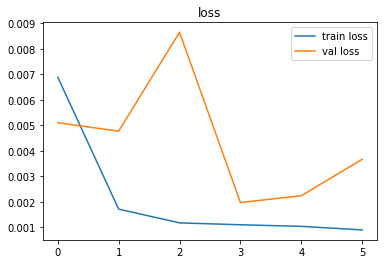

Calculating training stats...
10290/10290 [==============================] - 82s 8ms/step
(10, 3, 224, 224, 3)


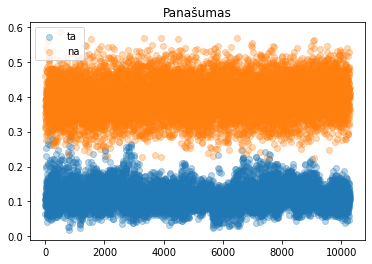

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:17<00:00,  6.86s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Processing recall locations: 100%|██████████| 1000/1000 [04:08<00:00,  4.02it/s]



--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/EfficientNetV2B0 nn251-train251-id64-od8-e6-b16
Experiments already complete. Remove the '.complete' file for re-run
--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/EfficientNetV2B0 nn251-train0-id64-od8-e6-b16
Epoch 1/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0053 - pd: 0.6843 - nd: 1.4578
Epoch 1: val_loss improved from inf to 0.00325, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/EfficientNetV2B0/weights.best.hdf5
2172/2172 [==============================] - 352s 157ms/step - loss: 0.0053 - pd: 0.6843 - nd: 1.4578 - val_loss: 0.0032 - val_pd: 0.4743 - val_nd: 1.3343 - lr: 0.0010
Epoch 2/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0017 - pd: 0.6303 - nd: 1.4337
Epoch 2: val_loss improved from 0.00325 to 0.00280, saving model t

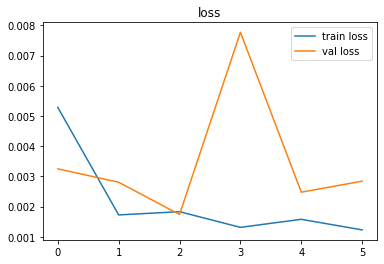

Calculating training stats...
10290/10290 [==============================] - 80s 8ms/step
(10, 3, 224, 224, 3)


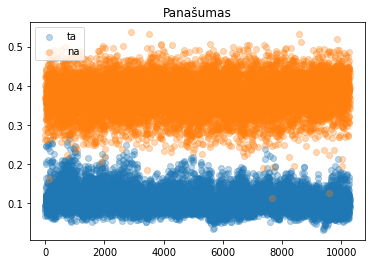

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:17<00:00,  6.87s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Processing recall locations: 100%|██████████| 1000/1000 [04:10<00:00,  3.99it/s]



--------------------------------------------------------------------------------


In [ ]:
import multiprocessing

for options in efficient_b0_tests.generate_options():
    p1 = multiprocessing.Process(target=run_efficient_net, args=[options])

    p1.start()
    p1.join()

In [ ]:
resnet_tests = BuilderTests(
    ingest_denses=[128],
    output_denses=[8],
    modelNNs=[
        ModelNN(80, [80, 60, 38, 0]),
        ModelNN(50, [50, 38, 0]),  
        ModelNN(142, [142, 80]),
    ],
    epochs_list=[6],
    batch_list=[16],
    builder_label="Experimental/NewTraining/ResNet50")

for test in resnet_tests.generate_options():
    print(test.representation())

nn80-train80-id128-od8-e6-b16
nn80-train60-id128-od8-e6-b16
nn80-train38-id128-od8-e6-b16
nn80-train0-id128-od8-e6-b16
nn50-train50-id128-od8-e6-b16
nn50-train38-id128-od8-e6-b16
nn50-train0-id128-od8-e6-b16
nn142-train142-id128-od8-e6-b16
nn142-train80-id128-od8-e6-b16


In [ ]:
def run_resnet_net(options):
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

    enable_gpu_memory_growth()

    model_builder = TestResNetBuilder(options)
    model_trainer = NewDataModelTrainer()

    model_trainer.run(model_builder)

    tf.keras.backend.clear_session()
    gc.collect()
    print("-" * 80)

Now testing... Experimental/NewTraining/ResNet50 nn80-train80-id128-od8-e6-b16
94781440/94765736 [==============================] - 2s 0us/step
Epoch 1/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0087 - pd: 0.6943 - nd: 1.3966
Epoch 1: val_loss improved from inf to 0.00307, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/ResNet50/weights.best.hdf5
2172/2172 [==============================] - 176s 77ms/step - loss: 0.0087 - pd: 0.6943 - nd: 1.3966 - val_loss: 0.0031 - val_pd: 0.5523 - val_nd: 1.3202 - lr: 0.0010
Epoch 2/6
2171/2172 [============================>.] - ETA: 0s - loss: 0.0019 - pd: 0.6527 - nd: 1.3934
Epoch 2: val_loss improved from 0.00307 to 0.00224, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/ResNet50/weights.best.hdf5
2172/2172 [==============================] - 168s 77ms/step - loss: 0.0019 - pd: 0.6528 - nd: 1.3934 - val_loss: 0.0022 - val_pd: 0.5494 - val_nd: 1.3385 - lr: 0.0010
Epoch 3/6
2171/2172 [=

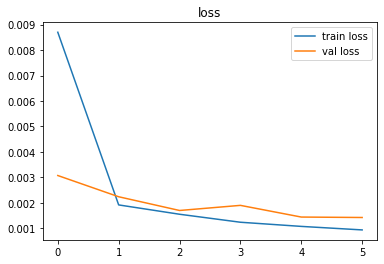

Calculating training stats...
10290/10290 [==============================] - 55s 5ms/step
(10, 3, 224, 224, 3)


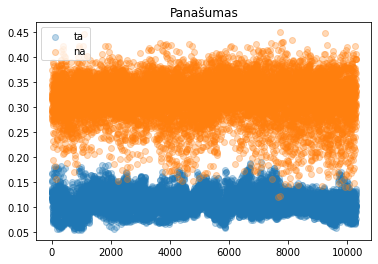

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:06<00:00,  6.31s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Processing recall locations: 100%|██████████| 1000/1000 [08:30<00:00,  1.96it/s]



--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/ResNet50 nn80-train60-id128-od8-e6-b16
Epoch 1/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0028 - pd: 0.6718 - nd: 1.4289
Epoch 1: val_loss improved from inf to 0.00301, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/ResNet50/weights.best.hdf5
2172/2172 [==============================] - 220s 98ms/step - loss: 0.0028 - pd: 0.6718 - nd: 1.4289 - val_loss: 0.0030 - val_pd: 0.5235 - val_nd: 1.3317 - lr: 0.0010
Epoch 2/6
2172/2172 [==============================] - ETA: 0s - loss: 8.0792e-04 - pd: 0.6481 - nd: 1.4220
Epoch 2: val_loss improved from 0.00301 to 0.00226, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/ResNet50/weights.best.hdf5
2172/2172 [==============================] - 212s 98ms/step - loss: 8.0792e-04 - pd: 0.6481 - nd: 1.4220 - val_loss: 0.0023 - val_pd: 0.5276 - val_nd: 1.3070 - lr: 0.00

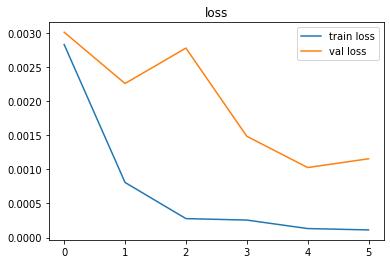

Calculating training stats...
10290/10290 [==============================] - 55s 5ms/step
(10, 3, 224, 224, 3)


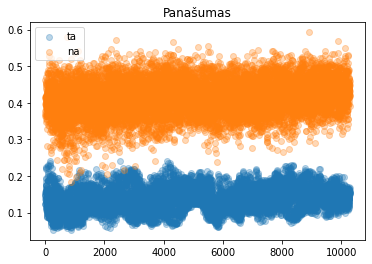

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:05<00:00,  6.28s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Processing recall locations: 100%|██████████| 1000/1000 [08:40<00:00,  1.92it/s]



--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/ResNet50 nn80-train38-id128-od8-e6-b16
Epoch 1/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0029 - pd: 0.6827 - nd: 1.4311
Epoch 1: val_loss improved from inf to 0.00291, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/ResNet50/weights.best.hdf5
2172/2172 [==============================] - 271s 122ms/step - loss: 0.0029 - pd: 0.6827 - nd: 1.4311 - val_loss: 0.0029 - val_pd: 0.4829 - val_nd: 1.3004 - lr: 0.0010
Epoch 2/6
2172/2172 [==============================] - ETA: 0s - loss: 8.1963e-04 - pd: 0.6493 - nd: 1.4270
Epoch 2: val_loss improved from 0.00291 to 0.00242, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/ResNet50/weights.best.hdf5
2172/2172 [==============================] - 265s 122ms/step - loss: 8.1963e-04 - pd: 0.6493 - nd: 1.4270 - val_loss: 0.0024 - val_pd: 0.4981 - val_nd: 1.2753 - lr: 0.

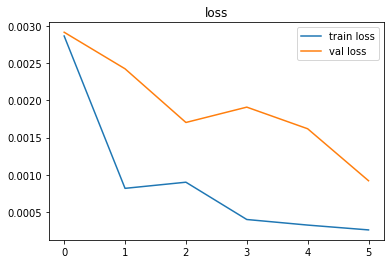

Calculating training stats...
10290/10290 [==============================] - 55s 5ms/step
(10, 3, 224, 224, 3)


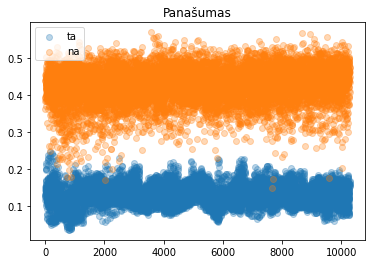

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:04<00:00,  6.24s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Processing recall locations: 100%|██████████| 1000/1000 [08:49<00:00,  1.89it/s]



--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/ResNet50 nn80-train0-id128-od8-e6-b16
Epoch 1/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0045 - pd: 0.6873 - nd: 1.4276
Epoch 1: val_loss improved from inf to 0.00392, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/ResNet50/weights.best.hdf5
2172/2172 [==============================] - 436s 198ms/step - loss: 0.0045 - pd: 0.6873 - nd: 1.4276 - val_loss: 0.0039 - val_pd: 0.5211 - val_nd: 1.3350 - lr: 0.0010
Epoch 2/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0019 - pd: 0.6618 - nd: 1.4255
Epoch 2: val_loss did not improve from 0.00392
2172/2172 [==============================] - 428s 197ms/step - loss: 0.0019 - pd: 0.6618 - nd: 1.4255 - val_loss: 0.0209 - val_pd: 0.4807 - val_nd: 1.1819 - lr: 0.0010
Epoch 3/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0016 - pd: 0.6589 - nd: 1.4251
E

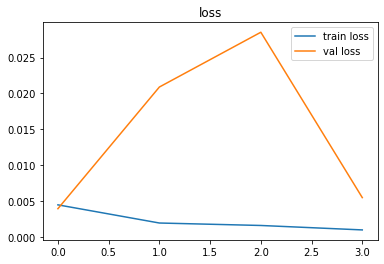

Calculating training stats...
10290/10290 [==============================] - 55s 5ms/step
(10, 3, 224, 224, 3)


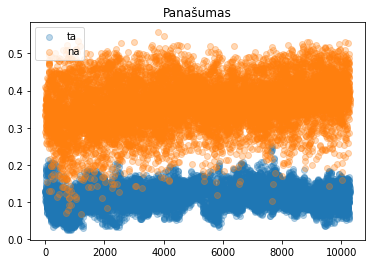

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:05<00:00,  6.29s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Processing recall locations: 100%|██████████| 1000/1000 [08:37<00:00,  1.93it/s]



--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/ResNet50 nn50-train50-id128-od8-e6-b16
Epoch 1/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0102 - pd: 0.7062 - nd: 1.4004
Epoch 1: val_loss improved from inf to 0.00533, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/ResNet50/weights.best.hdf5
2172/2172 [==============================] - 132s 58ms/step - loss: 0.0102 - pd: 0.7062 - nd: 1.4004 - val_loss: 0.0053 - val_pd: 0.5615 - val_nd: 1.3067 - lr: 0.0010
Epoch 2/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0029 - pd: 0.6564 - nd: 1.3974
Epoch 2: val_loss improved from 0.00533 to 0.00375, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/ResNet50/weights.best.hdf5
2172/2172 [==============================] - 127s 58ms/step - loss: 0.0029 - pd: 0.6564 - nd: 1.3974 - val_loss: 0.0038 - val_pd: 0.5659 - val_nd: 1.3264 - lr: 0.0010
Epoch

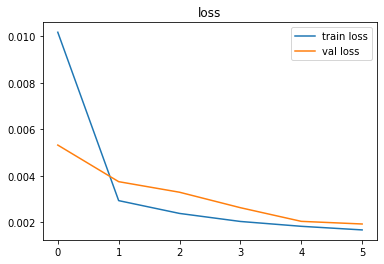

Calculating training stats...
10290/10290 [==============================] - 41s 4ms/step
(10, 3, 224, 224, 3)


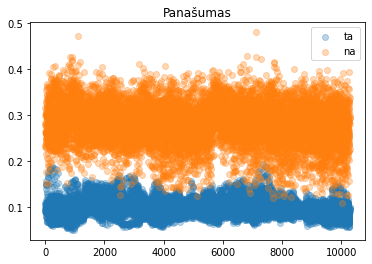

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:03<00:00,  6.19s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Processing recall locations: 100%|██████████| 1000/1000 [08:35<00:00,  1.94it/s]



--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/ResNet50 nn50-train38-id128-od8-e6-b16
Epoch 1/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0040 - pd: 0.6901 - nd: 1.4341
Epoch 1: val_loss improved from inf to 0.00504, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/ResNet50/weights.best.hdf5
2172/2172 [==============================] - 160s 71ms/step - loss: 0.0040 - pd: 0.6901 - nd: 1.4341 - val_loss: 0.0050 - val_pd: 0.4867 - val_nd: 1.2655 - lr: 0.0010
Epoch 2/6
2171/2172 [============================>.] - ETA: 0s - loss: 8.9133e-04 - pd: 0.6637 - nd: 1.4302
Epoch 2: val_loss improved from 0.00504 to 0.00397, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/ResNet50/weights.best.hdf5
2172/2172 [==============================] - 154s 71ms/step - loss: 8.9102e-04 - pd: 0.6637 - nd: 1.4302 - val_loss: 0.0040 - val_pd: 0.5118 - val_nd: 1.2869 - lr: 0.00

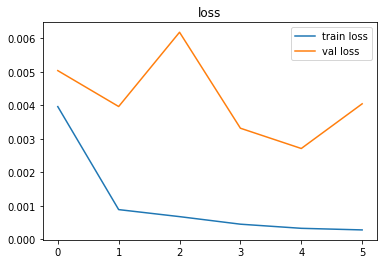

Calculating training stats...
10290/10290 [==============================] - 41s 4ms/step
(10, 3, 224, 224, 3)


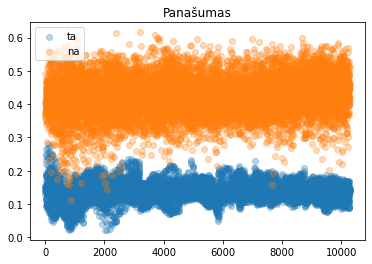

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:04<00:00,  6.24s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Processing recall locations: 100%|██████████| 1000/1000 [08:34<00:00,  1.95it/s]



--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/ResNet50 nn50-train0-id128-od8-e6-b16
Epoch 1/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0047 - pd: 0.7011 - nd: 1.4318
Epoch 1: val_loss improved from inf to 0.00408, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/ResNet50/weights.best.hdf5
2172/2172 [==============================] - 326s 148ms/step - loss: 0.0047 - pd: 0.7011 - nd: 1.4318 - val_loss: 0.0041 - val_pd: 0.5733 - val_nd: 1.3359 - lr: 0.0010
Epoch 2/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0019 - pd: 0.6801 - nd: 1.4298
Epoch 2: val_loss did not improve from 0.00408
2172/2172 [==============================] - 321s 148ms/step - loss: 0.0019 - pd: 0.6801 - nd: 1.4298 - val_loss: 0.0070 - val_pd: 0.5803 - val_nd: 1.3285 - lr: 0.0010
Epoch 3/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0012 - pd: 0.6649 - nd: 1.4274
E

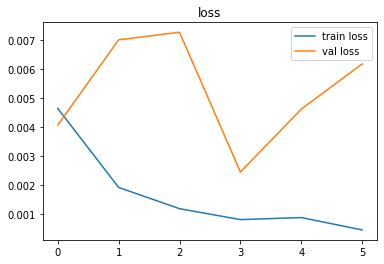

Calculating training stats...
10290/10290 [==============================] - 40s 4ms/step
(10, 3, 224, 224, 3)


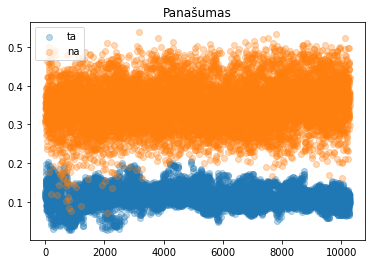

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:02<00:00,  6.13s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Processing recall locations: 100%|██████████| 1000/1000 [08:35<00:00,  1.94it/s]



--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/ResNet50 nn142-train142-id128-od8-e6-b16
Epoch 1/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0064 - pd: 0.6757 - nd: 1.3955
Epoch 1: val_loss improved from inf to 0.00202, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/ResNet50/weights.best.hdf5
2172/2172 [==============================] - 224s 101ms/step - loss: 0.0064 - pd: 0.6757 - nd: 1.3955 - val_loss: 0.0020 - val_pd: 0.5301 - val_nd: 1.3335 - lr: 0.0010
Epoch 2/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0012 - pd: 0.6538 - nd: 1.3949
Epoch 2: val_loss improved from 0.00202 to 0.00188, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/ResNet50/weights.best.hdf5
2172/2172 [==============================] - 220s 101ms/step - loss: 0.0012 - pd: 0.6538 - nd: 1.3949 - val_loss: 0.0019 - val_pd: 0.5132 - val_nd: 1.2842 - lr: 0.0010
E

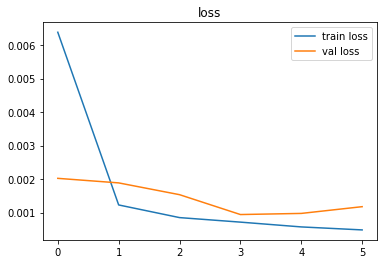

Calculating training stats...
10290/10290 [==============================] - 82s 8ms/step
(10, 3, 224, 224, 3)


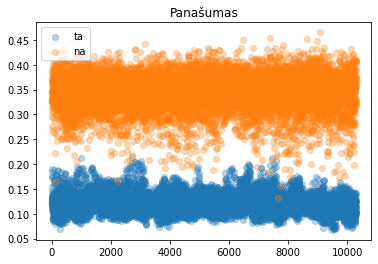

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:09<00:00,  6.49s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Processing recall locations: 100%|██████████| 1000/1000 [05:00<00:00,  3.33it/s]



--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/ResNet50 nn142-train80-id128-od8-e6-b16
Epoch 1/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0025 - pd: 0.6384 - nd: 1.4304
Epoch 1: val_loss improved from inf to 0.00211, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/ResNet50/weights.best.hdf5
2172/2172 [==============================] - 324s 146ms/step - loss: 0.0025 - pd: 0.6384 - nd: 1.4304 - val_loss: 0.0021 - val_pd: 0.4863 - val_nd: 1.2894 - lr: 0.0010
Epoch 2/6
2172/2172 [==============================] - ETA: 0s - loss: 6.8486e-04 - pd: 0.6335 - nd: 1.4266
Epoch 2: val_loss improved from 0.00211 to 0.00158, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/ResNet50/weights.best.hdf5
2172/2172 [==============================] - 319s 147ms/step - loss: 6.8486e-04 - pd: 0.6335 - nd: 1.4266 - val_loss: 0.0016 - val_pd: 0.5073 - val_nd: 1.3125 - lr: 0

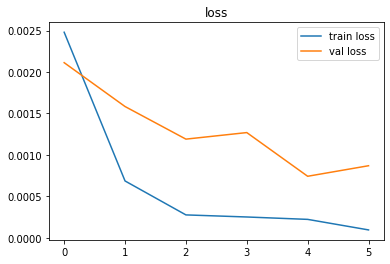

Calculating training stats...
10290/10290 [==============================] - 81s 8ms/step
(10, 3, 224, 224, 3)


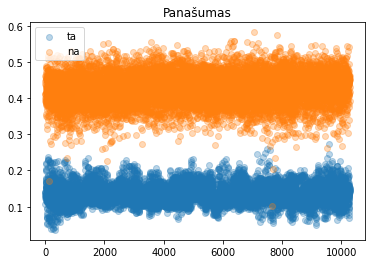

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:10<00:00,  6.53s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Processing recall locations: 100%|██████████| 1000/1000 [05:08<00:00,  3.24it/s]



--------------------------------------------------------------------------------


In [ ]:
import multiprocessing

for options in resnet_tests.generate_options():
    p1 = multiprocessing.Process(target=run_resnet_net, args=[options])

    p1.start()
    p1.join()